# O4

## Problem
DONE! - dataanalyse

## Datasæt 
DONE! - dataanalyse

# Valg af ML
* Bruger supervised learning
* Bruger CNN da det er billede data
* Bruger categorical_crossentropy algorith, da vi har flere kategorier eller SparseCategoricalCrossentropy
* Maybe need preprocessed
* Hvordan forholder vi os til over and underfitting
* RandomGridSearch?

## Håndtering af optimering, fordele og ulemper 
* Overfitting/underfitting
* Optimeringsparametre, hyperparameterrummet 
* 

https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

https://www.tensorflow.org/tutorials/images/classification
```
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
```

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

In [6]:
#make function to fetch dataset

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


def getDataSet(categories: list, folder: str):
    images = []
    labels = []
    for category in categories:
        folder_path = os.path.join(folder, category)
        label = categories.index(category)  # Assign a numerical label to each category
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (128, 128))  # Resize to a common size
                    img = img / 255.0  # Normalize pixel values to [0, 1]
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Failed to load image: {img_path}")
    return images, labels




O4.ipynb          ReadMe.md         dataanalyse.ipynb weather_dataset


Failed to load image: weather_dataset/Shine/shine131.jpg
Failed to load image: weather_dataset/Rain/rain141.jpg


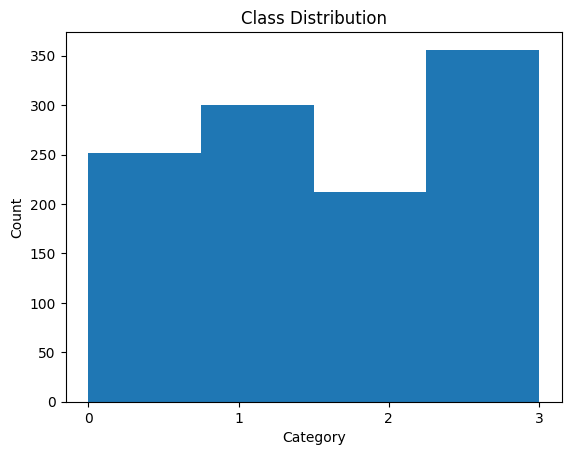

Category for image 0: Shine


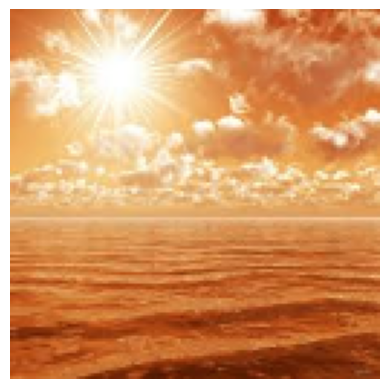

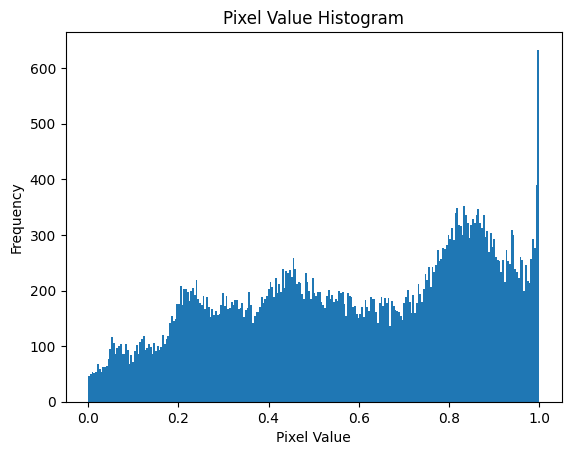

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

! ls
# ! dir
data_folder = "weather_dataset"
categories = ["Shine", "Cloudy", "Rain", "Sunrise"]

#X is images
#y is labels

X, y = getDataSet(categories, data_folder)

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Assuming 'labels' is a list or NumPy array of category labels
# You can create histograms of the labels to visualize the class distribution
plt.hist(y, bins=len(np.unique(y)))  # Use as many bins as unique labels
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(np.unique(y))  # Set x-ticks to unique class labels
plt.show()

# Assuming 'images' is a NumPy array containing the image data
# You can create a histogram of pixel values for one image (e.g., the first image)
print(f"Category for image 0: {categories[y[0]]}")
  
plt.imshow(X[0])
plt.axis('off')  # Optional: Turn off the axis labels and ticks
#plt.title(categories[X[0]])
plt.show()

plt.hist(X[0].ravel(), bins=256, range=(0, 1))  # Assuming normalized pixel values in [0, 1]
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Histogram')
plt.show()

In [23]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

# Create binary target variable y_train_5 with the digit '5' as true
y_train_1 = (y_train == '1')   # True for all 5s, False for all other digits
# Create binary target variable for the testing set
y_test_1  = (y_test == '1')

# Create a SGDClassifier which will classify if a digit is a 5 or not
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier using the training data
sgd_clf.fit(X_train, y_train_1)

y_pred = sgd_clf.predict(X_test)

classified_numbers = np.where(y_pred == y_test_1)[0]

%matplotlib inline
def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

for number in classified_numbers[:3]:
    MNIST_PlotDigit(X_test[number])
    # Predict if the digit is a 5 or not
    prediction = sgd_clf.predict([X_test[number]])  # Provide the data sample
    print(f"Predicted Label: {prediction[0]}")
    plt.show()

ValueError: Found array with dim 11. None expected <= 2.

In [ ]:
from keras.utils import plot_model, to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

print("X_train shape before reshape:", X_train.shape)
print("X_test shape before reshape:", X_test.shape)

# # Remove first element
X_train = X_train.reshape((896, 128, 128, 3)).astype('float32') / 255.0
X_test = X_test.reshape((224, 128, 128, 3)).astype('float32') / 255.0

print("X_train shape after reshape:", X_train.shape)
print("X_test shape after reshape:", X_test.shape)


y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)


# Assuming y_train is one-hot encoded, convert it back to class labels
y_train_labels = np.argmax(y_train, axis=1)
print("Unique values in y_train after to_categorical:", np.unique(y_train))


# 3, 3 means pixel... creates a 3x 3 pixels.
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same",activation='relu', input_shape=(128, 128 , 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Plot the model
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

folds = 3
kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
test_accuracy = []

train_losses = []
train_accuracies = []


for train, val in kfold.split(X_train, y_train.argmax(1)):

    model = createModel()

    X_train_kfold, x_val_kfold = X_train[train], X_train[val]
    y_train_kfold, y_val_kfold = y_train[train], y_train[val]

    fold_train_losses = []
    fold_train_accuracies = []

    for epoch in range(17): 
        history = model.fit(X_train_kfold, y_train_kfold, epochs=1, batch_size=64, verbose=0)

        fold_train_losses.append(history.history['loss'][0])
        fold_train_accuracies.append(history.history['accuracy'][0])

    train_losses.append(fold_train_losses)
    train_accuracies.append(fold_train_accuracies)


    test_loss, test_accuracy = model.evaluate(X_test, y_test)

avg_accuracy = np.mean(test_accuracy)
print(f'Test average accuracy: {avg_accuracy}')

train_losses = np.array(train_losses)
train_accuracies = np.array(train_accuracies)

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(np.mean(train_losses, axis=0), label='Training Loss')
plt.title('Training Loss Over Iterations')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(np.mean(train_accuracies, axis=0), label='Training Accuracy')
plt.title('Training Accuracy Over Iterations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

X_train shape before reshape: (896, 128, 128, 3)
X_test shape before reshape: (224, 128, 128, 3)
X_train shape after reshape: (896, 128, 128, 3)
X_test shape after reshape: (224, 128, 128, 3)
Unique values in y_train after to_categorical: [0. 1.]


ValueError: Found array with dim 10. None expected <= 2.

hellopello